<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [7]:
# reading in the file
import pandas as pd
import zipfile

zf = zipfile.ZipFile('../module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip') 
df = pd.read_csv(zf.open('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'))

df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [8]:
df.shape

(28332, 24)

In [18]:
""" PREPROCESSING & TOKENIZING """
import numpy as np

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

STOPWORDS = set(STOPWORDS).union(set(['thisisatest', 'fakestopwordhere']))

def tokenize(doc):
    """ Takes a doc and returns the tokens using gensim utilities """
    return [token for token in simple_preprocess(doc) if token not in STOPWORDS]

df['tokens'] = [tokenize(doc) for doc in df['reviews.text']]

In [19]:
df.head(2)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, item, bad, quality, missing, backup, s..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, products, like]"


In [33]:
""" FIT A GENSIM LDA TOP MODEL """

# A Dictionary Representation of all the words in our corpus
# This is analogous to fitting a model with our tokens
# takes a list of docs and their listed tokens and builds a dictionary of id's and words
id2word = corpora.Dictionary(df['tokens'])
id2word.token2id['car']

777

In [52]:
# Gets the "bag of words" of the id2word dictionary.
id2word.doc2bow(tokenize("test apple giant huge far"))

[(195, 1), (375, 1), (982, 1), (1436, 1), (1815, 1)]

In [36]:
import sys
print(sys.getsizeof(id2word))

56


In [37]:
len(id2word.keys())

9621

In [38]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

In [39]:
len(id2word.keys())

3581

In [40]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
# Although abstracted away - tokenization IS happening in the doc_stream f(x)
corpus = [id2word.doc2bow(doc) for doc in df['tokens']]

In [42]:
corpus[345][:10]

[(17, 1), (18, 1), (21, 1), (34, 1)]

In [59]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 20,
                   passes=3,
                   workers=12
                  )

In [60]:
# Import regular expressions
import re
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [61]:
topics = [' '.join(t[0:5]) for t in words]

In [62]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
games loves love play kids

------ Topic 1 ------
great nice tablet like kids

------ Topic 2 ------
great gift tablet price christmas

------ Topic 3 ------
great tablet screen hd price

------ Topic 4 ------
great batteries amazon use easy

------ Topic 5 ------
great tablet use love price

------ Topic 6 ------
tablet great amazon easy hd

------ Topic 7 ------
tablet great amazon price batteries

------ Topic 8 ------
tablet great amazon games year

------ Topic 9 ------
kindle amazon batteries like use

------ Topic 10 ------
batteries great price buy work

------ Topic 11 ------
great device screen tablet kindle

------ Topic 12 ------
batteries long great price amazon

------ Topic 13 ------
batteries use great kindle screen

------ Topic 14 ------
tablet keyboard store time good

------ Topic 15 ------
great tablet love amazon works

------ Topic 16 ------
tablet entertainment amazon great good

------ Topic 17 ------
tablet great use good time

------ Top

In [63]:
""" SELECTION OF MOST APPROPRIATE TOPICS USING COHERENCE VALUES """
distro = [lda[d] for d in corpus]
num_topics = 20

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            # Topic is Tuple where the first part is the topic id
            # the second part is the topic distribution in that doc
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [65]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
65    -0.213677 -0.024300       1        1  4.520240
72    -0.207448 -0.070876       2        1  4.490060
34    -0.183405 -0.055035       3        1  3.825374
35    -0.181117 -0.047735       4        1  3.226166
86    -0.175109 -0.029184       5        1  2.505361
...         ...       ...     ...      ...       ...
77    -0.004597 -0.000990      96        1  0.576032
42     0.055847 -0.001652      97        1  0.568857
63    -0.032678 -0.001839      98        1  0.562451
74     0.000145 -0.039002      99        1  0.470771
92     0.002703  0.015274     100        1  0.468016

[100 rows x 5 columns], topic_info=           Term         Freq        Total  Category  logprob  loglift
18    batteries  7031.000000  7031.000000   Default  30.0000  30.0000
2432     tablet  7258.000000  7258.000000   Default  29.0000  29.0000
21        great  8679.000000  8679.000000   Default  28.0000  28.0000
755        easy  3268.000000  3268.000000   Default  27.0000  27.0000
34         good  4938.000000  4938.000000   Default  26.0000  26.0000
...         ...          ...          ...       ...      ...      ...
28       bought     9.778924  3304.456055  Topic100  -4.9917  -0.4584
94          use     9.650885  4649.673828  Topic100  -5.0049  -0.8131
12         like     8.692158  2398.852539  Topic100  -5.1095  -0.2559
235      device     7.555060  1069.369019  Topic100  -5.2497   0.4118
2086      books     7.631031  1751.519775  Topic100  -5.2397  -0.0716

[6803 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
56        1  0.137032    aa
56        2  0.331657    aa
56        3  0.113200    aa
56        4  0.047663    aa
56        5  0.119158    aa
...     ...       ...   ...
3580     63  0.801372  äôve
3560     16  0.232063    äù
3560     30  0.232063    äù
3560     55  0.232063    äù
3560     90  0.232063    äù

[45261 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[66, 73, 35, 36, 87, 91, 38, 23, 53, 94, 55, 68, 42, 10, 12, 72, 63, 48, 3, 19, 2, 32, 11, 25, 67, 44, 100, 27, 16, 4, 65, 13, 29, 15, 22, 49, 46, 20, 85, 9, 83, 1, 54, 33, 37, 69, 92, 47, 70, 88, 56, 45, 98, 97, 40, 30, 8, 82, 71, 81, 18, 51, 84, 58, 59, 95, 76, 14, 5, 96, 60, 17, 21, 61, 52, 99, 57, 62, 86, 80, 89, 26, 7, 74, 77, 34, 79, 24, 50, 90, 39, 31, 41, 6, 28, 78, 43, 64, 75, 93])

In [66]:
topics = pd.DataFrame.from_records(new_distro)
topics.head()

,0,1,2,3,4,5,6,7,8,9,...,70,74,98,94,33,28,59,68,62,90
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249627,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df['primaryTopic'] = topics.idxmax(axis=1)

In [68]:
df[['primaryTopic', 'reviews.rating']].groupby('primaryTopic').mean()

,reviews.rating
primaryTopic,
0,4.717026
1,4.566154
2,4.640288
3,4.732323
4,4.540541
...,...
95,4.210526
96,4.579208
97,4.497462


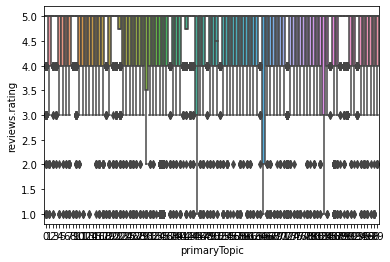

In [69]:
import seaborn as sns

ax = sns.boxplot(x="primaryTopic", y="reviews.rating",
                 data=df)

In [70]:
df['reviews.numHelpful'].describe()

count    16115.000000
mean         0.529321
std          9.345017
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        621.000000
Name: reviews.numHelpful, dtype: float64

In [71]:
topics_df = pd.DataFrame.from_records(new_distro)
topics_df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,74,98,94,33,28,59,68,62,90
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.249627,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
""" VISUALIZING TOPICS """

# Reading elements of statistical learning. Will finish this tonight after/during afterhours.

In [ ]:
""" FINDINGS """


## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling